# Zisk a zpracování obrazových dat

## Scrapování dat

Zdroj dat: https://www.zoopraha.cz/multimedia/prenos-z-udoli-slonu-zive?cam=6&res=l&start=6


In [2]:
from visualize.helper import *
from scraping.scraping import scraping

SCRAPED_DIR = 'scraped_images'
scraping(SCRAPED_DIR)



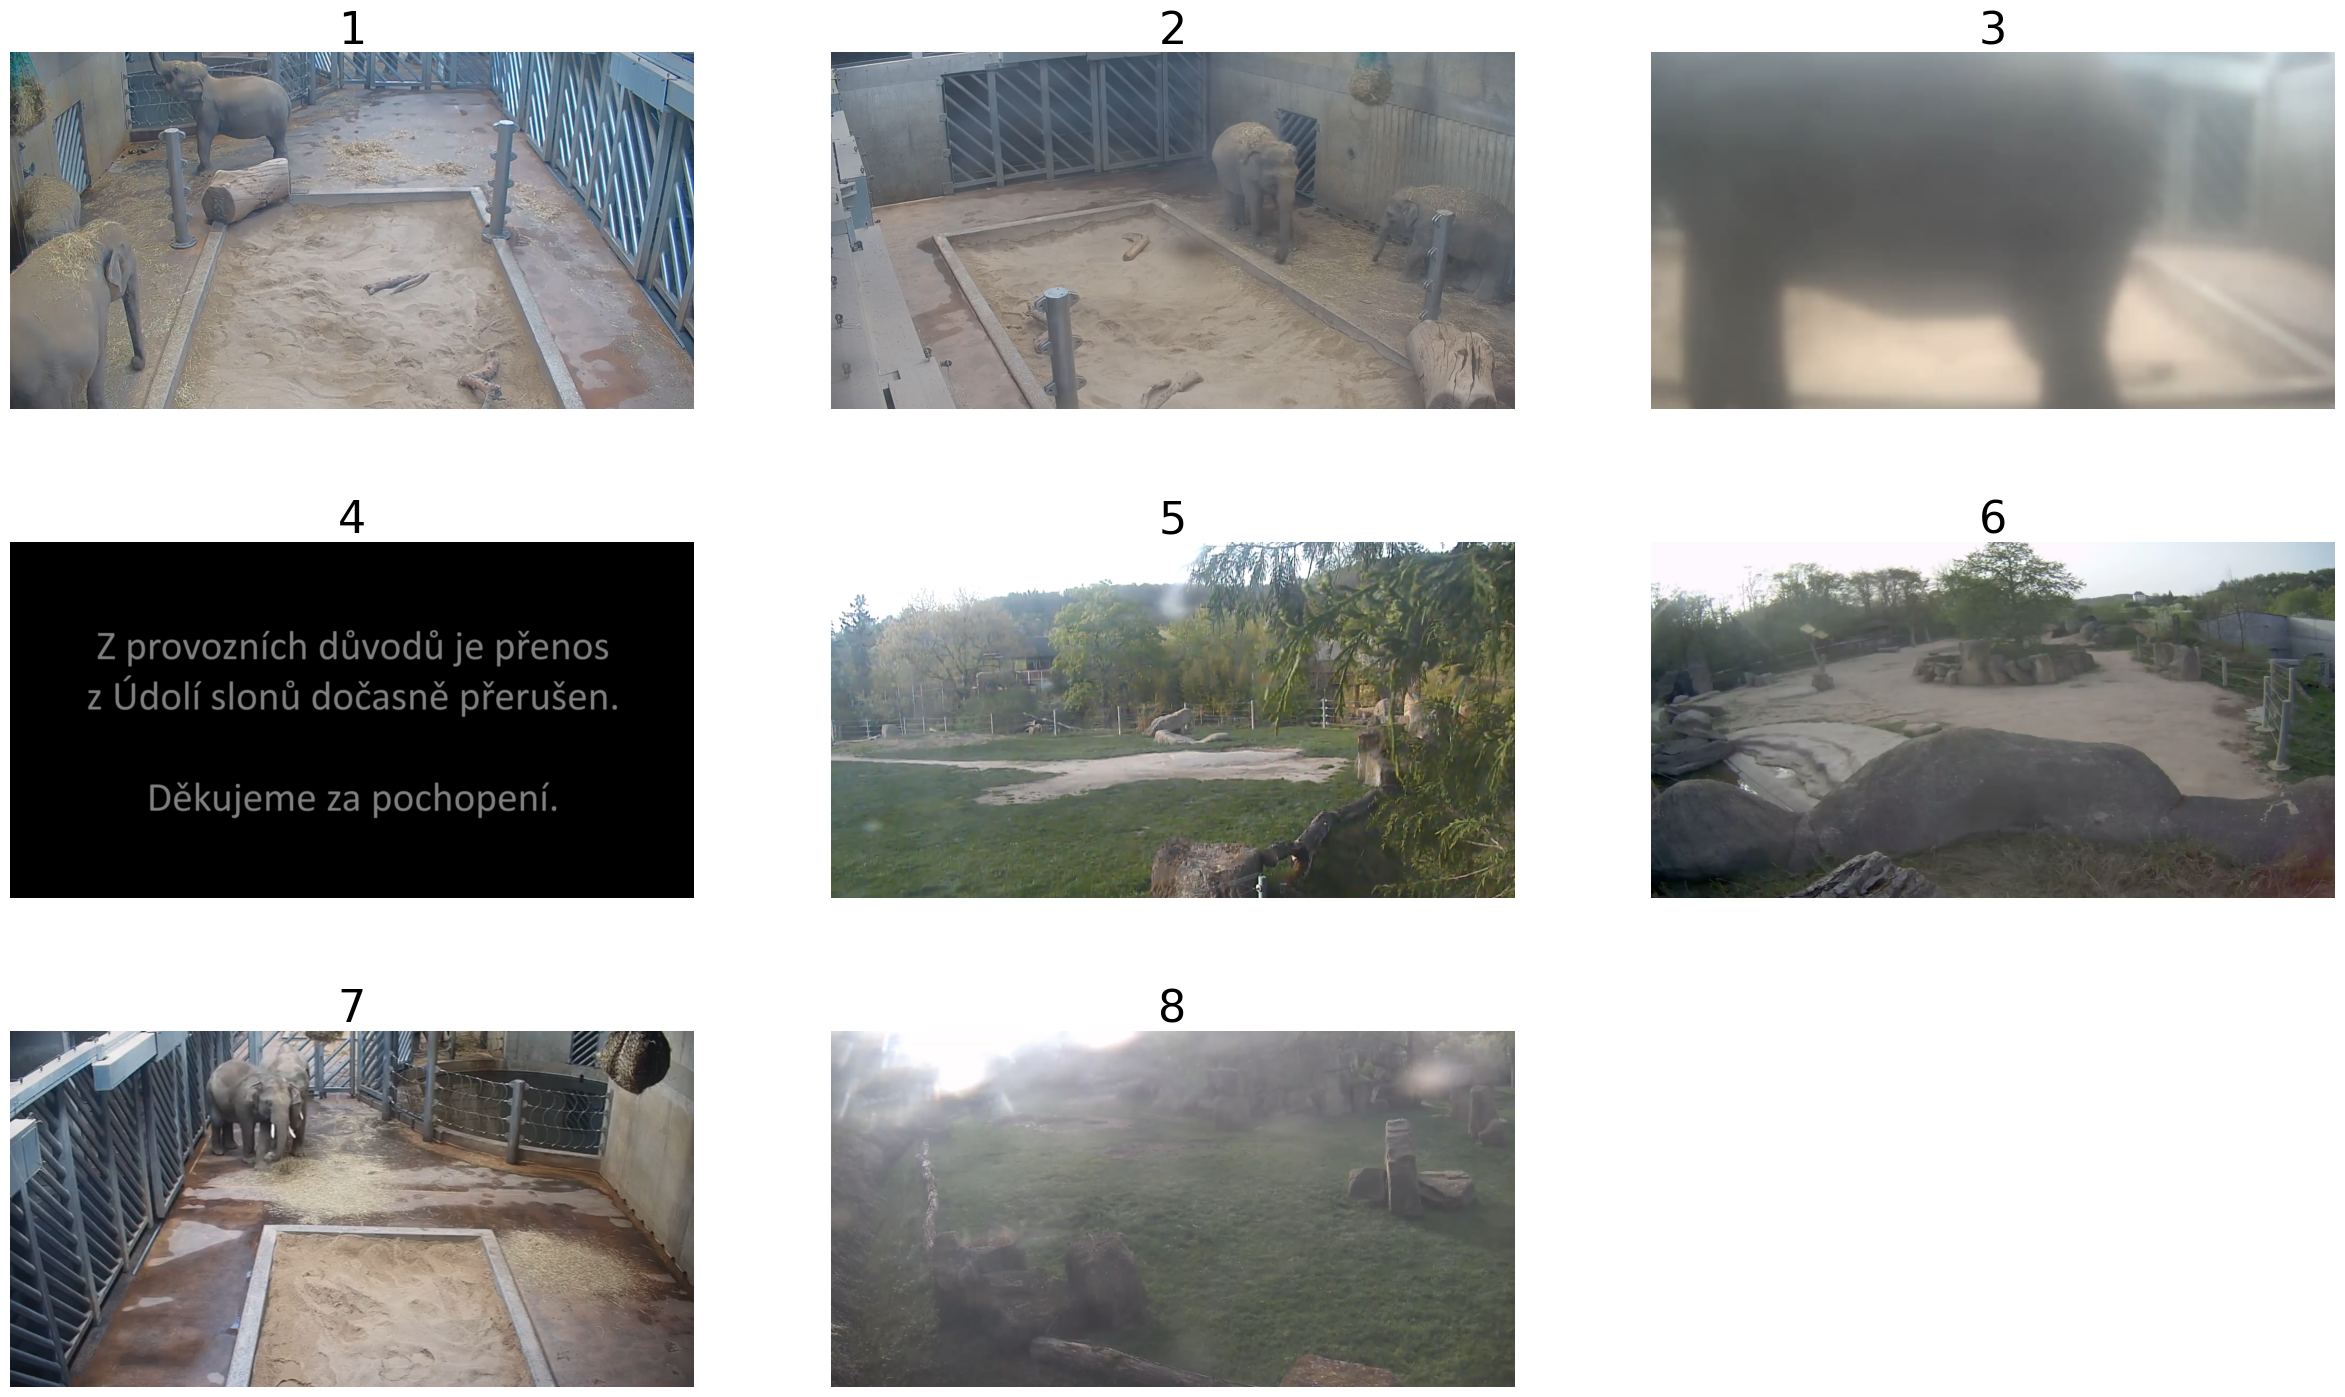

In [7]:
import os
images = []

sorted_filenames = sorted(os.listdir(SCRAPED_DIR))

for filename in sorted_filenames:
    file_path = os.path.join(SCRAPED_DIR, filename)
    img = cv2.imread(file_path)
    if img is not None:
            images.append(img)
plot_images(*images, titles=[1,2,3,4,5,6,7,8])

## Automatická anotace obrázků

In [2]:
from detector.elephant_detector import ElephantDetector
PATH_TO_WEIGHTS = 'best.pt'
detector = ElephantDetector(PATH_TO_WEIGHTS)

SCRAPED_DIR = 'showcase_scraped_images' # Prepared data

device = cpu


#### COCO JSON formát

In [5]:
OUTPUT_JSON = 'annotations.json'
detector.coco_annotate(dir_path=SCRAPED_DIR, output_path=OUTPUT_JSON)


image 1/8 /Users/tomasnguyen/FIT/BP/showcase_scraped_images/screenshot1_08_04__18_00.png: 352x640 2 Elephants, 1425.3ms
image 2/8 /Users/tomasnguyen/FIT/BP/showcase_scraped_images/screenshot2_08_04__18_00.png: 352x640 2 Elephants, 1542.6ms
image 3/8 /Users/tomasnguyen/FIT/BP/showcase_scraped_images/screenshot3_08_04__18_00.png: 352x640 1 Elephant, 1989.0ms
image 4/8 /Users/tomasnguyen/FIT/BP/showcase_scraped_images/screenshot4_08_04__18_00.png: 352x640 (no detections), 2445.7ms
image 5/8 /Users/tomasnguyen/FIT/BP/showcase_scraped_images/screenshot5_08_04__18_00.png: 352x640 (no detections), 1932.3ms
image 6/8 /Users/tomasnguyen/FIT/BP/showcase_scraped_images/screenshot6_08_04__18_00.png: 352x640 (no detections), 2280.3ms
image 7/8 /Users/tomasnguyen/FIT/BP/showcase_scraped_images/screenshot7_08_04__18_00.png: 352x640 1 Elephant, 2476.6ms
image 8/8 /Users/tomasnguyen/FIT/BP/showcase_scraped_images/screenshot8_08_04__18_00.png: 352x640 (no detections), 2118.6ms
Speed: 9.4ms preprocess, 

#### YOLO formát

In [9]:
OUTPUT_DIR = 'output_labels'
detector.yolo_annotate(dir_path=SCRAPED_DIR, output_path=OUTPUT_DIR)



image 1/8 /Users/tomasnguyen/FIT/BP/scraped_images/screenshot1_08_04__18_00.png: 352x640 2 Elephants, 1590.2ms
image 2/8 /Users/tomasnguyen/FIT/BP/scraped_images/screenshot2_08_04__18_00.png: 352x640 2 Elephants, 1615.9ms
image 3/8 /Users/tomasnguyen/FIT/BP/scraped_images/screenshot3_08_04__18_00.png: 352x640 1 Elephant, 1481.1ms
image 4/8 /Users/tomasnguyen/FIT/BP/scraped_images/screenshot4_08_04__18_00.png: 352x640 (no detections), 1536.6ms
image 5/8 /Users/tomasnguyen/FIT/BP/scraped_images/screenshot5_08_04__18_00.png: 352x640 (no detections), 1081.3ms
image 6/8 /Users/tomasnguyen/FIT/BP/scraped_images/screenshot6_08_04__18_00.png: 352x640 (no detections), 1825.6ms
image 7/8 /Users/tomasnguyen/FIT/BP/scraped_images/screenshot7_08_04__18_00.png: 352x640 1 Elephant, 1615.3ms
image 8/8 /Users/tomasnguyen/FIT/BP/scraped_images/screenshot8_08_04__18_00.png: 352x640 (no detections), 1823.9ms
Speed: 11.2ms preprocess, 1571.2ms inference, 0.9ms postprocess per image at shape (1, 3, 352, 64

#### Ukázka anotací


image 1/1 /Users/tomasnguyen/FIT/BP/showcase_scraped_images/screenshot2_08_04__18_00.png: 352x640 2 Elephants, 2829.4ms
Speed: 30.5ms preprocess, 2829.4ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)


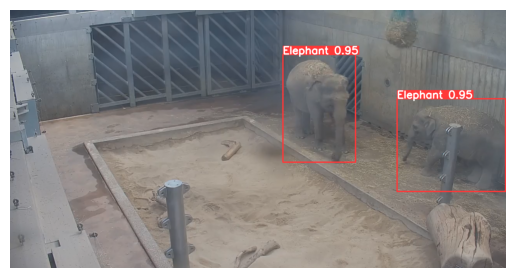

In [6]:
detector.show_labeled(SCRAPED_DIR+'/screenshot2_08_04__18_00.png')

### Preprocess data to YOLO format

#### 1. Convert JSON labels to YOLO format


```
data/
├── images
│   ├── screenshot_aa.png
│   ├── ...
│   └── screenshot_zz.png
└── labels
    ├── screenshot_aa.txt
    ├── ...
    └── screenshot_zz.txt
```

In [3]:
from yolo_preprocess.convert_json import convert_json

help(convert_json)
convert_json(images_dir='images', json_file='SLONICI-2.json', new_base_dir='data3')

Help on function convert_json in module yolo_preprocess.convert_json:

convert_json(images_dir, json_file, new_base_dir)



Annotations /home/improcloud/nguyehu7/BP/SLONICI-2.json: 100%|█| 3615/3615 [00:0


Converted 3615 labels from SLONICI-2.json
All images moved to data/images
All labels moved to data/labels


#### 2. Split the data into train/val/test datasets.

```
target/
├── images
│   ├── train: xx files
│   ├── val: yy files
│   └── test: zz files
└── labels
    ├── train: aa files
    ├── val: bb files
    └── test: cc files
```

In [4]:
from yolo_preprocess.yolo_train_test_split import data_split
data_split(path_dir='data3', target='target', create_new=False, keep_empty=True)


1


100%|████████████████████████████████████████| 554/554 [00:03<00:00, 158.55it/s]
